## **Question 1**

1. Data Collection
2. Data Cleaning
3. Data Analysis


In [40]:
import os

# Define the folder structure
base_dir = "Assignment1"
folders = ['DataCollection', 'DataCleaning', 'Analysis',
            'Analysis/Visualizations']

# Create the directories
for folder in folders:
    os.makedirs(os.path.join(base_dir, folder), exist_ok=True)

### **1. Data Collection**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Example frailty data (you would normally load this from a CSV or dataset)
data = {
    'Height': [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    'Weight': [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    'Age': [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    'Grip_strength': [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    'Frailty': ['N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N']
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,Height,Weight,Age,Grip_strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [42]:
# Create folder structure
os.makedirs('Assignment1/DataCollection/RawData', exist_ok=True)

# Save the raw data as a CSV file in the DataCollection/RawData folder
df.to_csv('Assignment1/DataCollection/RawData/frailty_data.csv', index=False)

### **2. Data Cleaning**

### **Outlier Detection**

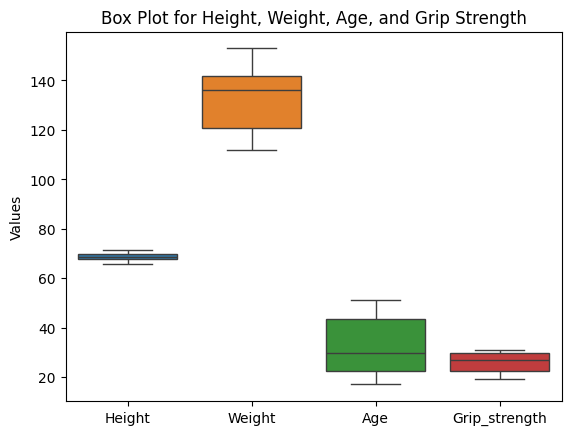

<Figure size 640x480 with 0 Axes>

In [43]:
# Box plot for height, weight, age, and grip strength
sns.boxplot(data=df[['Height', 'Weight', 'Age', 'Grip_strength']])
plt.title('Box Plot for Height, Weight, Age, and Grip Strength')
plt.ylabel('Values')
plt.show()

# Save the visualization
plt.savefig('Assignment2/Frailty/Analysis/Visualizations/boxplot_frailty_outliers.png')


### **Missing Values**

In [53]:
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0


**We can see that there are no missing values in our dataset.**

### **Datatypes**

In [54]:
df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,object


We can see that the frailty column is a categorical feature. Let's label encode it to convert it into numerical feature

In [55]:
# Encode the categorical variable 'Frailty' (0 for 'N', 1 for 'Y')
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip_strength,int64
Frailty,int64


In [56]:
#Null Values
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip_strength,0
Frailty,0


## **Save the processed data**

In [57]:
# Create the directory
os.makedirs('Assignment1/DataCleaning/ProcessedData', exist_ok=True)

# Save the processed data
df.to_csv('Assignment1/DataCleaning/ProcessedData/cleaned_frailty_data.csv', index=False)

### **3. Data Visualization**

<ipython-input-61-b3f9649facc0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Height', y='Age', data=df, palette='muted')


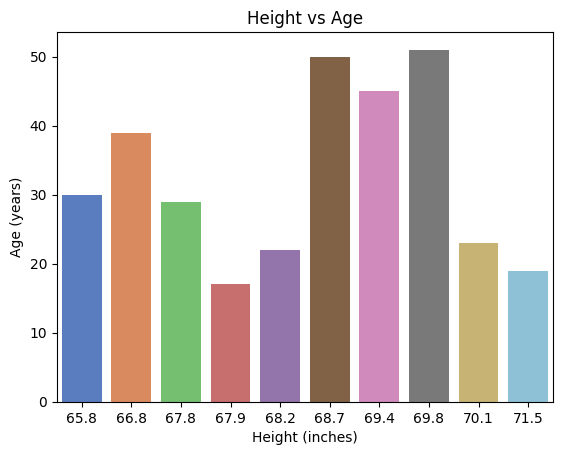

<Figure size 640x480 with 0 Axes>

In [61]:
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for Height vs Age
sns.barplot(x='Height', y='Age', data=df, palette='muted')
plt.title('Height vs Age')
plt.xlabel('Height (inches)')
plt.ylabel('Age (years)')
plt.show()

# Create the necessary directories if they don't exist
os.makedirs('Assignment1Frailty/Visualizations', exist_ok=True)

# Save the visualization
plt.savefig('Assignment1Frailty/Visualizations/height_vs_age_bar.png')

<ipython-input-66-b63c9dc422a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frailty', y='Grip_strength', data=df, palette='Set3')


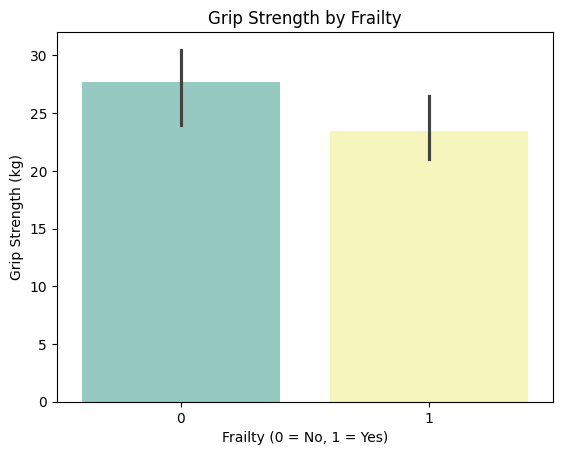

<Figure size 640x480 with 0 Axes>

In [66]:
# Bar plot for Grip Strength by Frailty
sns.barplot(x='Frailty', y='Grip_strength', data=df, palette='Set3')
plt.title('Grip Strength by Frailty')
plt.xlabel('Frailty (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength (kg)')
plt.show()

# Save the visualization
plt.savefig('Assignment1Frailty/Visualizations/grip_strength_by_frailty_bar.png')



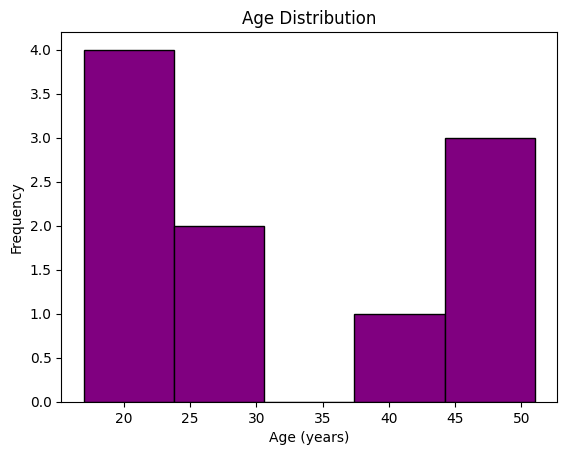

<Figure size 640x480 with 0 Axes>

In [64]:
# Histogram for Age Distribution
plt.hist(df['Age'], bins=5, color='purple', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Save the visualization
plt.savefig('Assignment1Frailty/Visualizations/age_distribution_histogram.png')



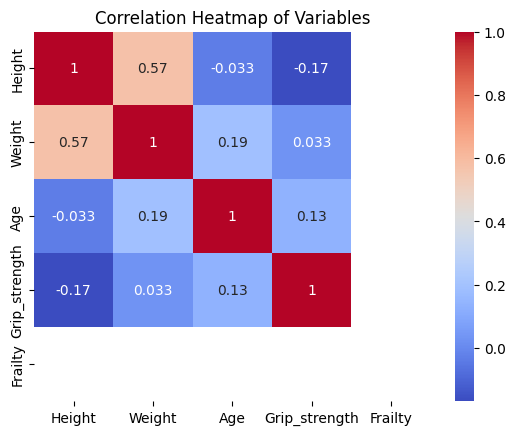

In [65]:
# Correlation matrix heatmap
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Variables')

# Save the visualization
plt.savefig('Assignment1Frailty/Visualizations/correlation_heatmap.png')
plt.show()
